In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv('netflix_titles.csv')

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
df.shape

(8807, 12)

In [9]:
for i in df.columns:
    null_rate = (df[i].isnull().sum())/df.shape[0]*100
    if null_rate>0:
        print('the null rate for {} is {:,.2f} %'.format(i, null_rate))

the null rate for director is 29.91 %
the null rate for cast is 9.37 %
the null rate for country is 9.44 %
the null rate for date_added is 0.11 %
the null rate for rating is 0.05 %
the null rate for duration is 0.03 %


In [10]:
df['date_added'] =df['date_added'].fillna(value=df['date_added'].mode()[0])
df['rating'] = df['rating'].fillna(value = df['rating'].mode(0)[0])
df['country'] = df['country'].fillna(value = df['country'].mode()[0])
# mode() 가장 비번ㄴ하게 관찰/측정되는 값


In [12]:
for i in df.columns:
    null_rate = (df[i].isnull().sum()) / df.shape[0] * 100
    if null_rate>0:
        print('the null rate for {} is {:,.2f} %'.format(i, null_rate))

the null rate for director is 29.91 %
the null rate for cast is 9.37 %
the null rate for duration is 0.03 %


In [13]:
df['director'].replace(np.nan, 'NO DATA', inplace= True)
df['cast'].replace(np.nan,'NO DATA', inplace=True )


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8807 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [15]:
import datetime
df['Data_new_added'] =pd.to_datetime(df['date_added'])

In [16]:
df['Data_new_added']

del df['date_added']

In [18]:
df['year_add'] = df['Data_new_added'].dt.year
df['month_add']= df['Data_new_added'].dt.month
df['month_add_name'] =df['Data_new_added'].dt.month_name()

In [22]:
df['country'].value_counts().head(10)

United States     3649
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: country, dtype: int64

In [23]:
df.groupby(['country', 'rating']).first()

show_id     type                            title  \
country           rating                                                     
, France, Algeria TV-14     s366    Movie                  Eyes of a Thief   
, South Korea     TV-MA     s194  TV Show                             D.P.   
Argentina         NR       s6553    Movie                        Daemonium   
                  R        s6483    Movie           Chronicle of an Escape   
                  TV-14    s1734  TV Show  Carmel: Who Killed Maria Marta?   
...                          ...      ...                              ...   
Vietnam           TV-14     s570    Movie                      Dreamy Eyes   
                  TV-G     s2058    Movie              Sky Tour: The Movie   
                  TV-MA     s743    Movie                 Camellia Sisters   
West Germany      TV-MA    s5613    Movie                Hitler - A Career   
Zimbabwe          TV-G     s2447    Movie                         Cook Off   

                                                       director  \
country           rating                                          
, France, Algeria TV-14                            Najwa Najjar   
, South Korea     TV-MA                                 NO DATA   
Argentina         NR                                Pablo Parés   
                  R                       Israel Adrián Caetano   
                  TV-14                      Alejandro Hartmann   
...                                                         ...   
Vietnam           TV-14                               Victor Vu   
                  TV-G                        Nguyen Thanh Tung   
                  TV-MA                       Bao Nhan, Namcito   
West Germany      TV-MA   Joachim Fest, Christian Herrendoerfer   
Zimbabwe          TV-G                          Tomas Brickhill   

                                                                       cast  \
country           rating                                                      
, France, Algeria TV-14   Khaled Abol El Naga, Souad Massi, Suhail Hadda...   
, South Korea     TV-MA   Jung Hae-in, Koo Kyo-hwan, Kim Sung-kyun, Son ...   
Argentina         NR      Walter Cornás, Dany Casco, Caro Angus, Rocío R...   
                  R       Rodrigo de la Serna, Pablo Echarri, Nazareno C...   
                  TV-14                                             NO DATA   
...                                                                     ...   
Vietnam           TV-14   Tran Nghia, Truc Anh, Tran Phong, Khanh Van, N...   
                  TV-G                                        Son Tung M-TP   
                  TV-MA   Le Khanh, Kaity Nguyen, Hong Van, Khuong Le, H...   
West Germany      TV-MA                                             NO DATA   
Zimbabwe          TV-G    Tendaiishe Chitima, Tendai Nguni, Jesese Mungo...   

                          release_year  duration  \
country           rating                           
, France, Algeria TV-14           2014   103 min   
, South Korea     TV-MA           2021  1 Season   
Argentina         NR              2015   115 min   
                  R               2006   104 min   
                  TV-14           2020  1 Season   
...                                ...       ...   
Vietnam           TV-14           2019   117 min   
                  TV-G            2020    93 min   
                  TV-MA           2021   117 min   
West Germany      TV-MA           1977   150 min   
Zimbabwe          TV-G            2017   100 min   

                                                                  listed_in  \
country           rating                                                      
, France, Algeria TV-14    Dramas, Independent Movies, International Movies   
, South Korea     TV-MA                   International TV Shows, TV Dramas   
Argentina         NR      Action & Adventure, Horror Movies, Internation...   
                  R                 Dr

Movie      0.696151
TV Show    0.303849
Name: type, dtype: float64


<AxesSubplot:xlabel='type', ylabel='count'>

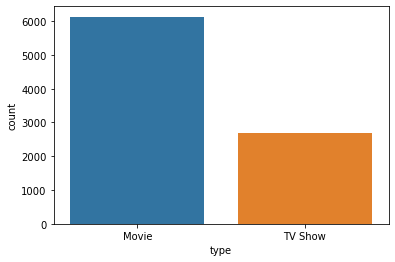

In [25]:
print(df['type'].value_counts()/df.shape[0])

sns.countplot(df['type'])

In [26]:
df.groupby('type').mean()

,release_year,year_add,month_add
type,,,
Movie,2013.121514,2018.849290,6.608057
TV Show,2016.605755,2018.927877,6.741405


In [27]:
df.groupby(['type', 'rating']).agg(['mean'])

release_year                Data_new_added     year_add  \
                         mean                          mean         mean   
type    rating                                                             
Movie   66 min    2015.000000 2016-08-15 00:00:00.000000000  2016.000000   
        74 min    2017.000000 2017-04-04 00:00:00.000000000  2017.000000   
        84 min    2010.000000 2016-09-16 00:00:00.000000000  2016.000000   
        G         1997.804878 2018-12-15 01:10:14.634146304  2018.560976   
        NC-17     2015.000000 2017-10-23 00:00:00.000000000  2017.333333   
        NR        2010.866667 2017-01-14 11:50:24.000000000  2016.546667   
        PG        2008.428571 2019-10-10 11:07:19.024390144  2019.299652   
        PG-13     2009.314286 2020-01-27 20:01:57.551020544  2019.577551   
        R         2010.459222 2019-10-15 17:29:44.190715392  2019.312422   
        TV-14     2012.606167 2019-05-06 18:22:57.435178752  2018.835319   
        TV-G      2016.396825 2019-07-12 15:48:34.285714176  2019.023810   
        TV-MA     2015.979651 2019-02-05 12:16:44.651162880  2018.604651   
        TV-PG     2012.524074 2019-01-05 15:04:00.000000000  2018.500000   
        TV-Y      2017.320611 2019-08-07 19:47:10.534351104  2018.992366   
        TV-Y7     2015.647482 2019-06-20 19:41:00.431654656  2019.028777   
        TV-Y7-FV  2015.000000 2017-07-10 00:00:00.000000000  2017.000000   
        UR        1999.333333 2018-11-15 00:00:00.000000000  2018.333333   
TV Show NR        2011.600000 2017-02-25 19:12:00.000000000  2016.800000   
        R         2015.500000 2018-02-16 00:00:00.000000000  2017.500000   
        TV-14     2015.698499 2019-04-05 07:12:11.787175936  2018.746248   
        TV-G      2014.872340 2019-07-25 10:58:43.404255232  2019.063830   
        TV-MA     2017.883173 2019-08-27 22:08:15.902353920  2019.149085   
        TV-PG     2015.210526 2019-01-24 07:21:21.733746176  2018.513932   
        TV-Y      2017.039773 2019-10-12 10:21:49.090909184  2019.255682   
        TV-Y7     2015.410256 2019-03-14 04:33:13.846153728  2018.723077   
        TV-Y7-FV  2014.000000 2015-05-31 00:00:00.000000000  2015.000000   

                 month_add  
                      mean  
type    rating              
Movie   66 min    8.000000  
        74 min    4.000000  
        84 min    9.000000  
        G         5.512195  
        NC-17     6.000000  
        NR        6.586667  
        PG        6.439024  
        PG-13     6.712245  
        R         6.422836  
        TV-14     6.741416  
        TV-G      6.730159  
        TV-MA     6.506298  
        TV-PG     6.798148  
        TV-Y      7.992366  
        TV-Y7     5.949640  
        TV-Y7-FV  7.000000  
        UR        7.333333  
TV Show NR        4.800000  
        R         8.000000  
        TV-14     6.780355  
        TV-G      6.638298  
        TV-MA     6.626853  
        TV-PG     7.247678  
        TV-Y      6.903409  
        TV-Y7     6.379487  
        TV-Y7-FV  5.000000

In [30]:
df['rating'].value_counts()
print(df['rating'].value_counts() /df.shape[0] *100)

TV-MA       36.459634
TV-14       24.525945
TV-PG        9.799024
R            9.072329
PG-13        5.563756
TV-Y7        3.792438
TV-Y         3.485864
PG           3.258771
TV-G         2.498013
NR           0.908368
G            0.465539
TV-Y7-FV     0.068128
NC-17        0.034064
UR           0.034064
74 min       0.011355
84 min       0.011355
66 min       0.011355
Name: rating, dtype: float64


In [32]:
df[df['type']=='Movie'].sort_values(by='year_add', ascending=False)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,Data_new_added,year_add,month_add,month_add_name
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NO DATA,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,2021,9,September
1016,s1017,Movie,Delhi Belly,Abhinay Deo,"Imran Khan, Vir Das, Kunaal Roy Kapur, Poorna ...",India,2011,TV-MA,101 min,"Action & Adventure, Comedies, International Mo...",Three flatmates get involved in the shady busi...,2021-04-17,2021,4,April
999,s1000,Movie,Stowaway,Joe Penna,"Anna Kendrick, Toni Collette, Daniel Dae Kim, ...","Germany, United States",2021,TV-MA,116 min,"Dramas, International Movies, Thrillers",A three-person crew on a mission to Mars faces...,2021-04-22,2021,4,April
1000,s1001,Movie,Wild Dog,Ahishor Solomon,"Nagarjuna Akkineni, Dia Mirza, Saiyami Kher, A...",United States,2020,TV-MA,126 min,"Action & Adventure, International Movies",A brash but brilliant Indian intelligence agen...,2021-04-22,2021,4,April
1001,s1002,Movie,Oloibiri,Curtis Graham,"Olu Jacobs, Richard Mofe-Damijo, William R. Mo...","Canada, Nigeria, United States",2015,TV-14,86 min,"Dramas, International Movies, Thrillers","After drilling depletes a small village, a cor...",2021-04-21,2021,4,April
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5950,s5951,Movie,Triumph of the Heart,Richard Michaels,"Mario Van Peebles, Susan Ruttan, Lane R. Davis...",United States,1991,TV-PG,93 min,"Dramas, Sports Movies","This drama tells the tale of Ricky Bell, a pro...",2011-10-01,2011,10,October
7370,s7371,Movie,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,1987,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",2010-11-01,2010,11,November
5956,s5957,Movie,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,2007,TV-MA,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,2009-05-05,2009,5,May
5955,s5956,Movie,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,2009,TV-MA,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",2009-11-18,2009,11,November


<AxesSubplot:xlabel='rating', ylabel='count'>

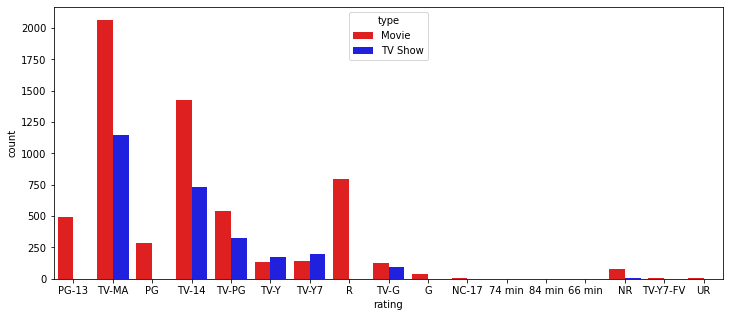

In [34]:
fig = plt.figure(figsize=(12,5))
sns.countplot(x='rating', data=df, hue='type', palette=['red', 'blue'])

In [36]:
print(df[df['type']=='Movie']['country'].value_counts().head(5)/df.shape[0])
print('\n--------------------------------------------')
print(df[df['type']=='TV Show']['country'].value_counts().head(5)/ df.shape[0])

United States     0.283638
India             0.101397
United Kingdom    0.023390
Canada            0.013853
Spain             0.011014
Name: country, dtype: float64

--------------------------------------------
United States     0.130691
United Kingdom    0.024185
Japan             0.019189
South Korea       0.017940
India             0.008970
Name: country, dtype: float64


In [37]:
df['director'].value_counts().head(5) /df.shape[0]

NO DATA                   0.299080
Rajiv Chilaka             0.002157
Raúl Campos, Jan Suter    0.002044
Suhas Kadav               0.001817
Marcus Raboy              0.001817
Name: director, dtype: float64

AttributeError: 'AxesSubplot' object has no attribute 'set_ylable'

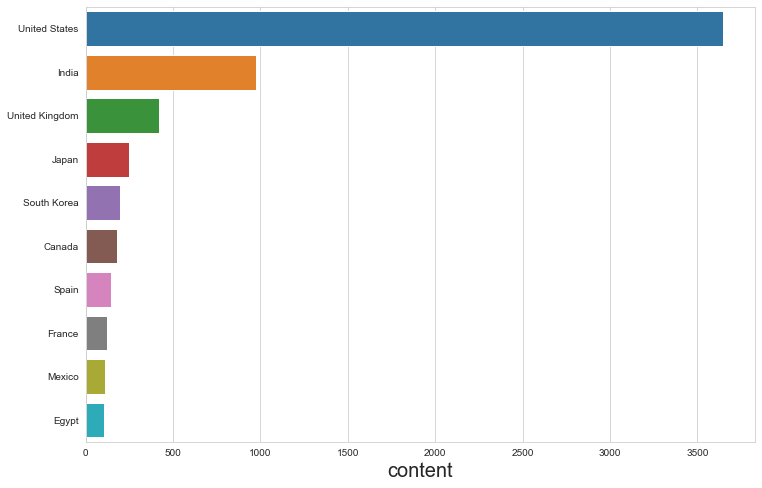

In [39]:
fig = plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
x =df['country'].value_counts().head(10)
ax = sns.barplot(x.values, x.index)
ax.set_xlabel('content', fontsize=20)
ax.set_ylable('country', fontsize=20)

Text(0, 0.5, 'director')

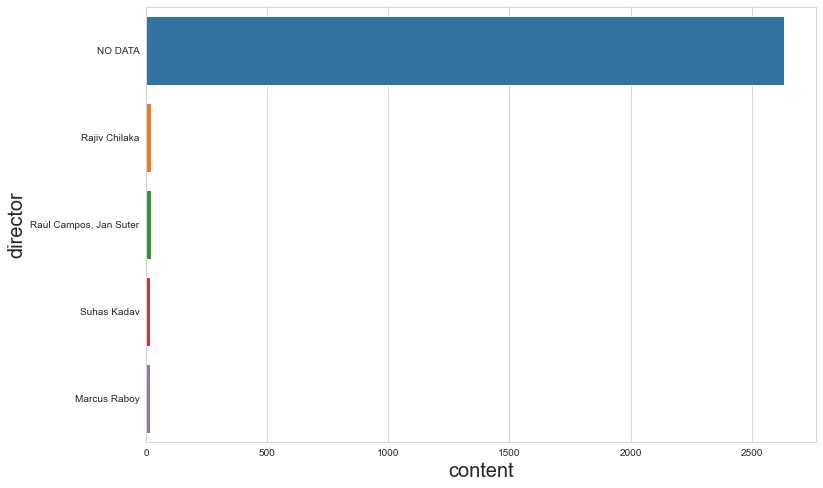

In [40]:
fig = plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
x= df['director'].value_counts().head(5)
ax = sns.barplot(x.values, x.index)
ax.set_xlabel('content', fontsize=20)
ax.set_ylabel('director', fontsize=20)

In [41]:
df['rating'].value_counts()

TV-MA       3211
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [42]:
df['listed_in'].value_counts()

Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: listed_in, Length: 514, dtype: int64

In [44]:
genra = df.listed_in.str.split(', ', expand=True).stack()

<AxesSubplot:xlabel='count'>

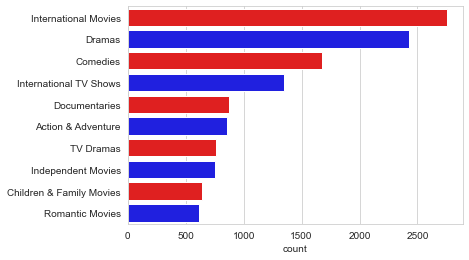

In [45]:
sns.countplot(y=genra, order=genra.value_counts().index[:10], palette=['red', 'blue'])

In [46]:
genra.value_counts()/df.shape[0] *100

International Movies            31.247871
Dramas                          27.557625
Comedies                        19.007608
International TV Shows          15.340070
Documentaries                    9.867151
Action & Adventure               9.753605
TV Dramas                        8.663563
Independent Movies               8.584081
Children & Family Movies         7.278301
Romantic Movies                  6.994436
TV Comedies                      6.597025
Thrillers                        6.551607
Crime TV Shows                   5.336664
Kids' TV                         5.120927
Docuseries                       4.485069
Music & Musicals                 4.257977
Romantic TV Shows                4.201204
Horror Movies                    4.053594
Stand-Up Comedy                  3.894629
Reality TV                       2.895424
British TV Shows                 2.872715
Sci-Fi & Fantasy                 2.759169
Sports Movies                    2.486658
Anime Series                     1

In [47]:
sort_data= df.sort_values('release_year', ascending = True)
sort_data[['title', 'release_year']][:10]

,title,release_year
4250,Pioneers: First Women Filmmakers*,1925
7790,Prelude to War,1942
8205,The Battle of Midway,1942
8660,Undercover: How to Operate Behind Enemy Lines,1943
8739,Why We Fight: The Battle of Russia,1943
8763,WWII: Report from the Aleutians,1943
8640,Tunisian Victory,1944
8436,The Negro Soldier,1944
8419,The Memphis Belle: A Story of a\nFlying Fortress,1944
7930,San Pietro,1945


In [ ]:
#https://www.kaggle.com/hamidalavirad/netflix-eda